In [1]:
options(width = 200)

In [16]:
install.packages("readxl")
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
library(readxl)
library(ggplot2)
library(dplyr)
library(tidyr)
library(dplyr)


In [4]:
df <- read_excel("/content/Dataset_JBS.xlsx")

In [5]:
head(df)

Indicador,4T24 (R$ Milhões),% ROL,3T24 (R$ Milhões),% ROL2,Var. 4T24 vs 3T24,4T23 (R$ Milhões),% ROL3,Var. 4T24 vs 4T23,2024 (R$ Milhões),% ROL4,2023 (R$ Milhões),% ROL5,Var. 2024 vs 2023
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Receita Líquida,116700.7,1,110497.9,1,5.6000000000000001E-2,96340.7,1,0.21099999999999999,416952.0,1.000,363816.5,1.000,0.14599999999999999
Custo dos Produtos Vendidos,-99308.9,-0.85099999999999998,-92309.5,-0.83499999999999996,7.5999999999999998E-2,-85246.0,-0.88500000000000001,0.16500000000000001,-354179.0,-0.849,-324167.5,-0.891,9.2999999999999999E-2
Lucro Bruto,17391.8,0.14899999999999999,18188.3,0.16500000000000001,-4.3999999999999997E-2,11094.8,0.115,0.56799999999999995,62773.0,0.151,39649.0,0.109,0.58299999999999996
Despesas com Vendas,-7241.1,-6.2E-2,-7578.8,-6.9000000000000006E-2,-4.4999999999999998E-2,-5977.2,-6.2E-2,0.21099999999999999,-26116.5,-0.063,-22941.2,-0.063,0.13800000000000001
Despesas Administrativas e Gerais,-4177.3,-3.5999999999999997E-2,-1876.9,-1.7000000000000001E-2,-,-3440.0,-3.5999999999999997E-2,0.214,-12305.3,-0.030,-11547.1,-0.032,6.6000000000000003E-2
Resultado Financeiro Líquido,-2105.2,-1.7999999999999999E-2,-2002.4,-1.7999999999999999E-2,5.0999999999999997E-2,-1686.9,-1.7999999999999999E-2,0.248,-8963.1,-0.021,-6748.0,-0.019,0.32800000000000001


## Analise inicial dos dados

*   Numero de exemplares
*   Tipos de dados
*   Medidas de posição e dispersão

In [6]:
## 1.0 Número de exemplares (linhas) e dimensões (colunas)
nrow(df)
ncol(df)

[1] 14

[1] 14

In [7]:
## 2.0 Tipo dos dados
str(df) #Alternativa 1
sapply(df, class) #Alternativa 2

tibble [14 × 14] (S3: tbl_df/tbl/data.frame)
 $ Indicador        : chr [1:14] "Receita Líquida" "Custo dos Produtos Vendidos" "Lucro Bruto" "Despesas com Vendas" ...
 $ 4T24 (R$ Milhões): num [1:14] 116701 -99309 17392 -7241 -4177 ...
 $ % ROL            : chr [1:14] "1" "-0.85099999999999998" "0.14899999999999999" "-6.2E-2" ...
 $ 3T24 (R$ Milhões): num [1:14] 110498 -92310 18188 -7579 -1877 ...
 $ % ROL2           : chr [1:14] "1" "-0.83499999999999996" "0.16500000000000001" "-6.9000000000000006E-2" ...
 $ Var. 4T24 vs 3T24: chr [1:14] "5.6000000000000001E-2" "7.5999999999999998E-2" "-4.3999999999999997E-2" "-4.4999999999999998E-2" ...
 $ 4T23 (R$ Milhões): num [1:14] 96341 -85246 11095 -5977 -3440 ...
 $ % ROL3           : chr [1:14] "1" "-0.88500000000000001" "0.115" "-6.2E-2" ...
 $ Var. 4T24 vs 4T23: chr [1:14] "0.21099999999999999" "0.16500000000000001" "0.56799999999999995" "0.21099999999999999" ...
 $ 2024 (R$ Milhões): num [1:14] 416952 -354179 62773 -26116 -12305 ...
 $ % RO

Indicador 4T24 (R$ Milhões)             % ROL 3T24 (R$ Milhões)            % ROL2 Var. 4T24 vs 3T24 4T23 (R$ Milhões)            % ROL3 Var. 4T24 vs 4T23 2024 (R$ Milhões)            % ROL4 
      "character"         "numeric"       "character"         "numeric"       "character"       "character"         "numeric"       "character"       "character"         "numeric"         "numeric" 
2023 (R$ Milhões)            % ROL5 Var. 2024 vs 2023 
        "numeric"         "numeric"       "character"

In [8]:
## 3.0 Medidas de posição e dispersão
summary(df)

  Indicador         4T24 (R$ Milhões)     % ROL           3T24 (R$ Milhões)      % ROL2          Var. 4T24 vs 3T24  4T23 (R$ Milhões)      % ROL3          Var. 4T24 vs 4T23  2024 (R$ Milhões)  
 Length:14          Min.   :-99308.9   Length:14          Min.   :-92309.50   Length:14          Length:14          Min.   :-85246.00   Length:14          Length:14          Min.   :-354179.0  
 Class :character   1st Qu.: -1799.3   Class :character   1st Qu.: -1971.03   Class :character   Class :character   1st Qu.: -1296.50   Class :character   Class :character   1st Qu.:  -8963.1  
 Mode  :character   Median :  -132.5   Mode  :character   Median :   -55.78   Mode  :character   Mode  :character   Median :    41.32   Mode  :character   Mode  :character   Median :   -587.8  
                    Mean   :  2611.9                      Mean   :  3175.26                                         Mean   :  1175.16                                         Mean   :  10451.2  
                    3rd Qu.:  

# Correlações, valores perdidos, anomalias e outliers


In [20]:
## 5.0 Correlações
numeric_cols <- sapply(df, is.numeric)
cor(df[, numeric_cols], use="complete.obs")

,4T24 (R$ Milhões),3T24 (R$ Milhões),4T23 (R$ Milhões),2024 (R$ Milhões),% ROL4,2023 (R$ Milhões),% ROL5
4T24 (R$ Milhões),1.0000000,0.9994979,0.9990645,0.9999762,0.9999762,0.9987351,0.9987393
3T24 (R$ Milhões),0.9994979,1.0000000,0.9975242,0.9996546,0.9996655,0.9970763,0.9970773
4T23 (R$ Milhões),0.9990645,0.9975242,1.0000000,0.9989221,0.9988991,0.9999701,0.9999708
2024 (R$ Milhões),0.9999762,0.9996546,0.9989221,1.0000000,0.9999996,0.9985896,0.9985934
% ROL4,0.9999762,0.9996655,0.9988991,0.9999996,1.0000000,0.9985614,0.9985651
2023 (R$ Milhões),0.9987351,0.9970763,0.9999701,0.9985896,0.9985614,1.0000000,0.9999999
% ROL5,0.9987393,0.9970773,0.9999708,0.9985934,0.9985651,0.9999999,1.0000000


In [21]:
## 6.0 Valores perdidos ou incorretos

sum(is.na(df))
colSums(is.na(df))


[1] 5

Indicador 4T24 (R$ Milhões)             % ROL 3T24 (R$ Milhões)            % ROL2 Var. 4T24 vs 3T24 4T23 (R$ Milhões)            % ROL3 Var. 4T24 vs 4T23 2024 (R$ Milhões)            % ROL4 
                0                 0                 0                 0                 0                 0                 0                 0                 0                 1                 1 
2023 (R$ Milhões)            % ROL5 Var. 2024 vs 2023 
                1                 1                 1

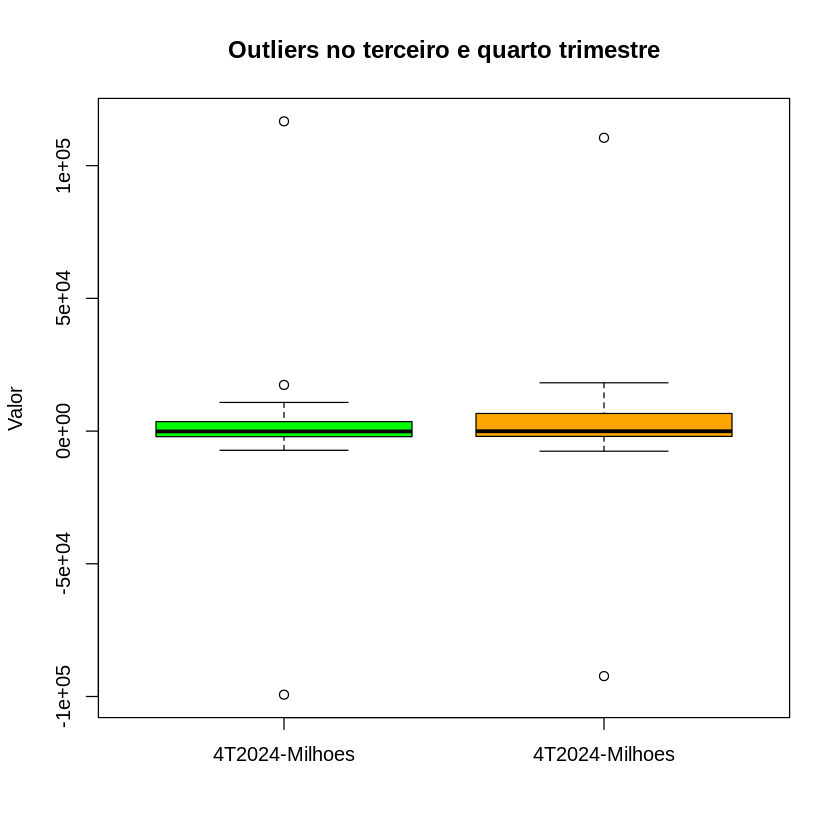

In [22]:
## 7.0 Identificação de outliers


boxplot(
  df$`4T24 (R$ Milhões)`,
  df$`3T24 (R$ Milhões)`,
  names = c("4T2024-Milhoes", "4T2024-Milhoes"),
  main = "Outliers no terceiro e quarto trimestre",
  ylab = "Valor",
  col = c("green", "orange")
)